In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df['oldpeak'].max()

6.2

## **Exploratory Data Analysis** (EDA)

In [4]:
df.shape

(1025, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [8]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


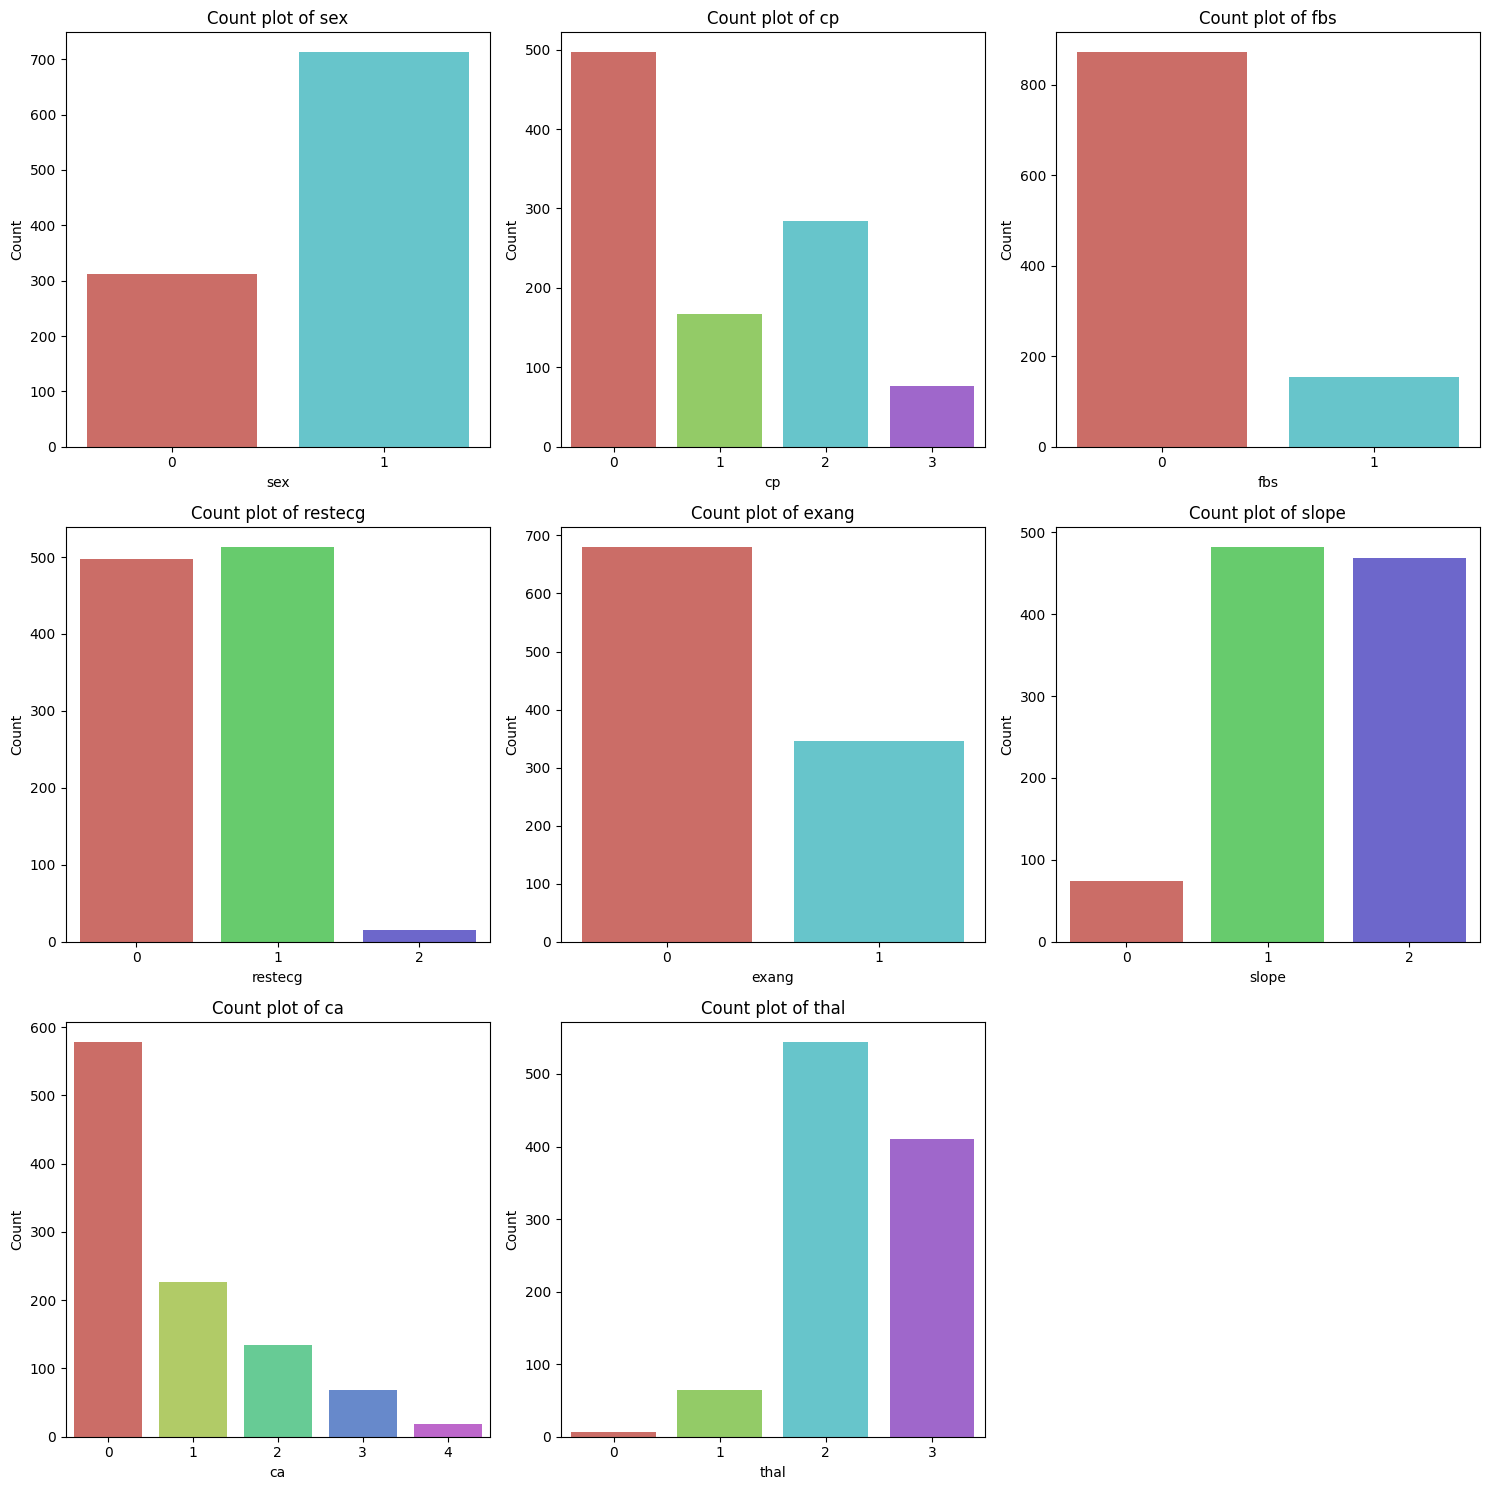

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is loaded into a DataFrame called 'data'

categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Calculate the number of rows needed
num_features = len(categorical_features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each categorical feature and plot
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axes[i], palette='hls')
    axes[i].set_title(f'Count plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Hide any unused subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [10]:
df['target'].value_counts()

,count
target,
1,526
0,499


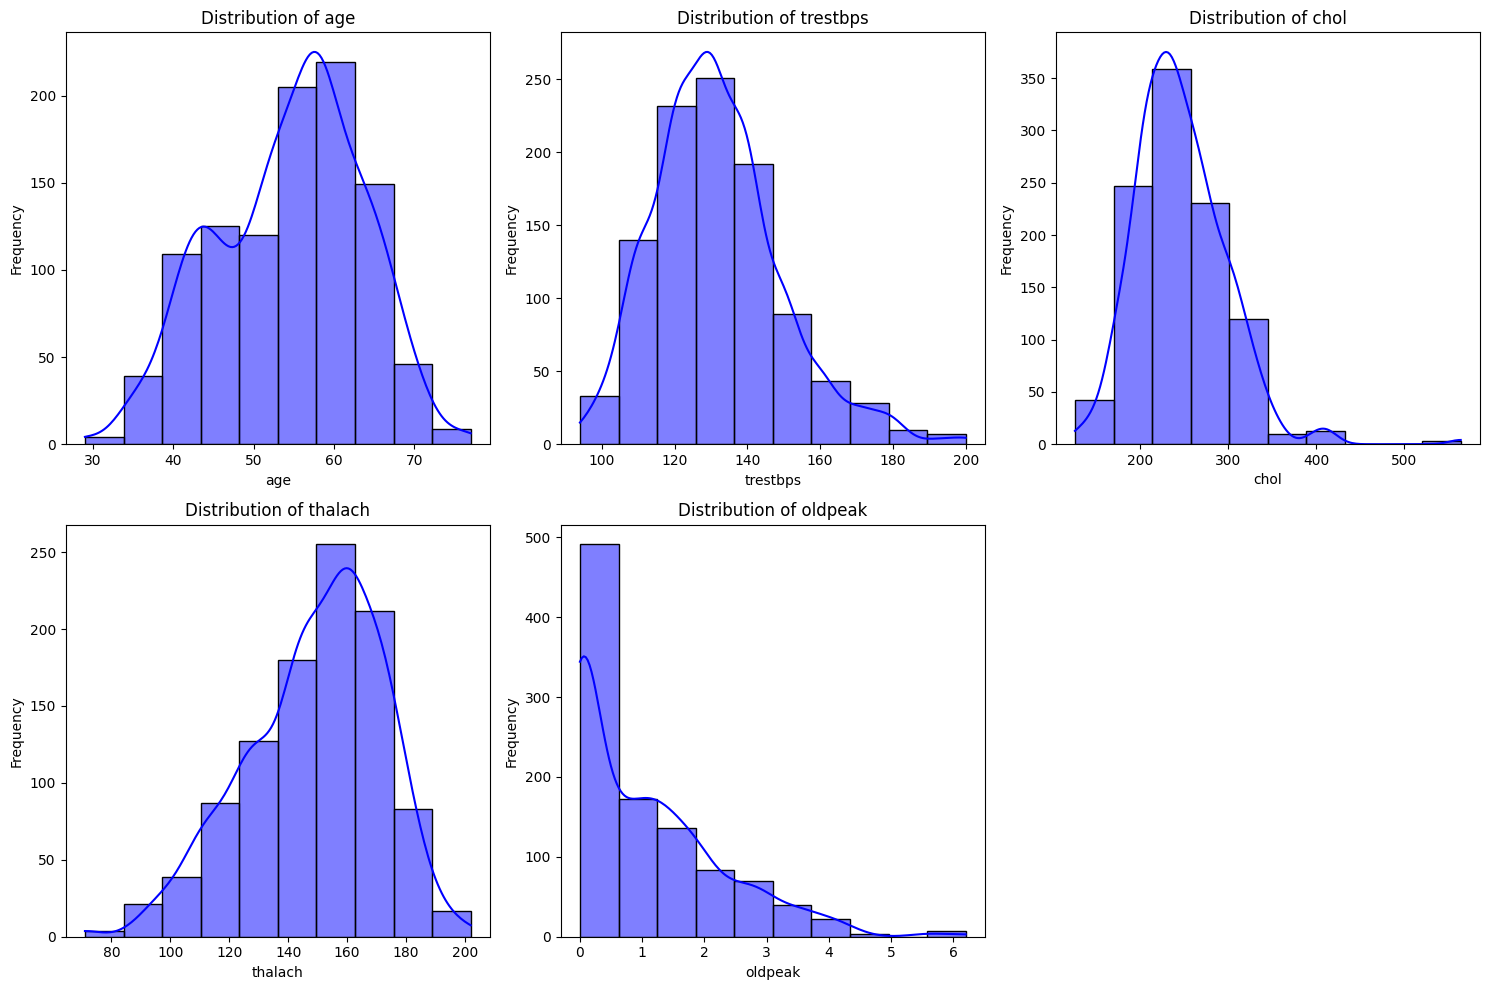

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Calculate the number of rows needed
num_features = len(numerical_features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each numerical feature and plot
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], bins=10, kde=True, color = 'blue', ax=axes[i])  # KDE for smooth curve
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

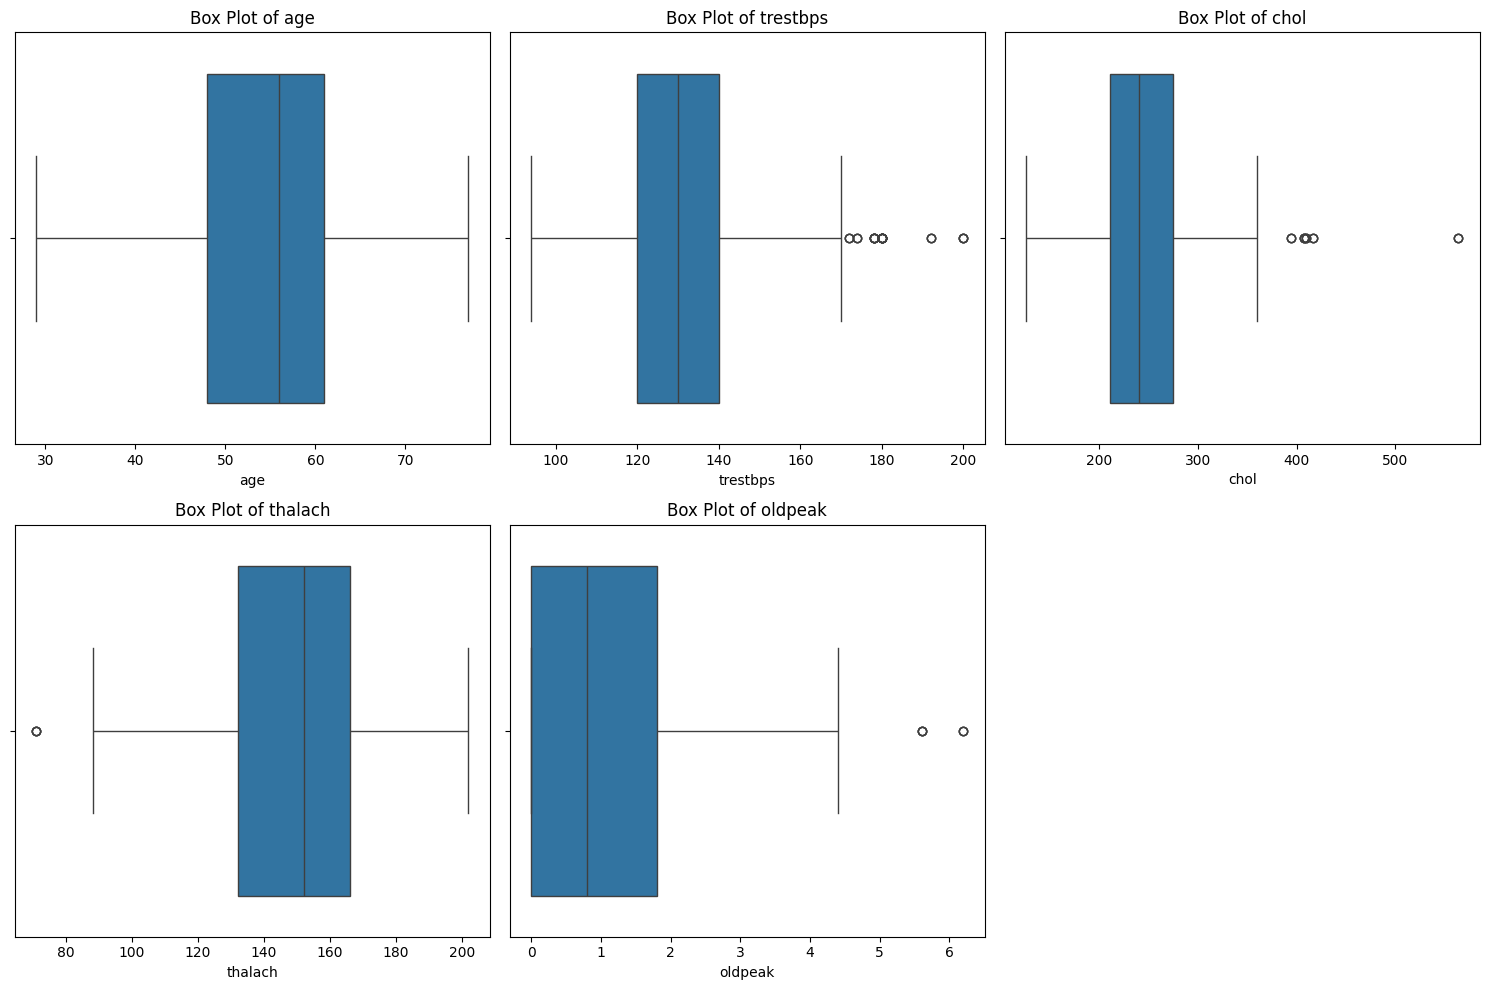

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Calculate the number of rows needed
num_features = len(numerical_features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each numerical feature and plot
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel(feature)

# Hide any unused subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

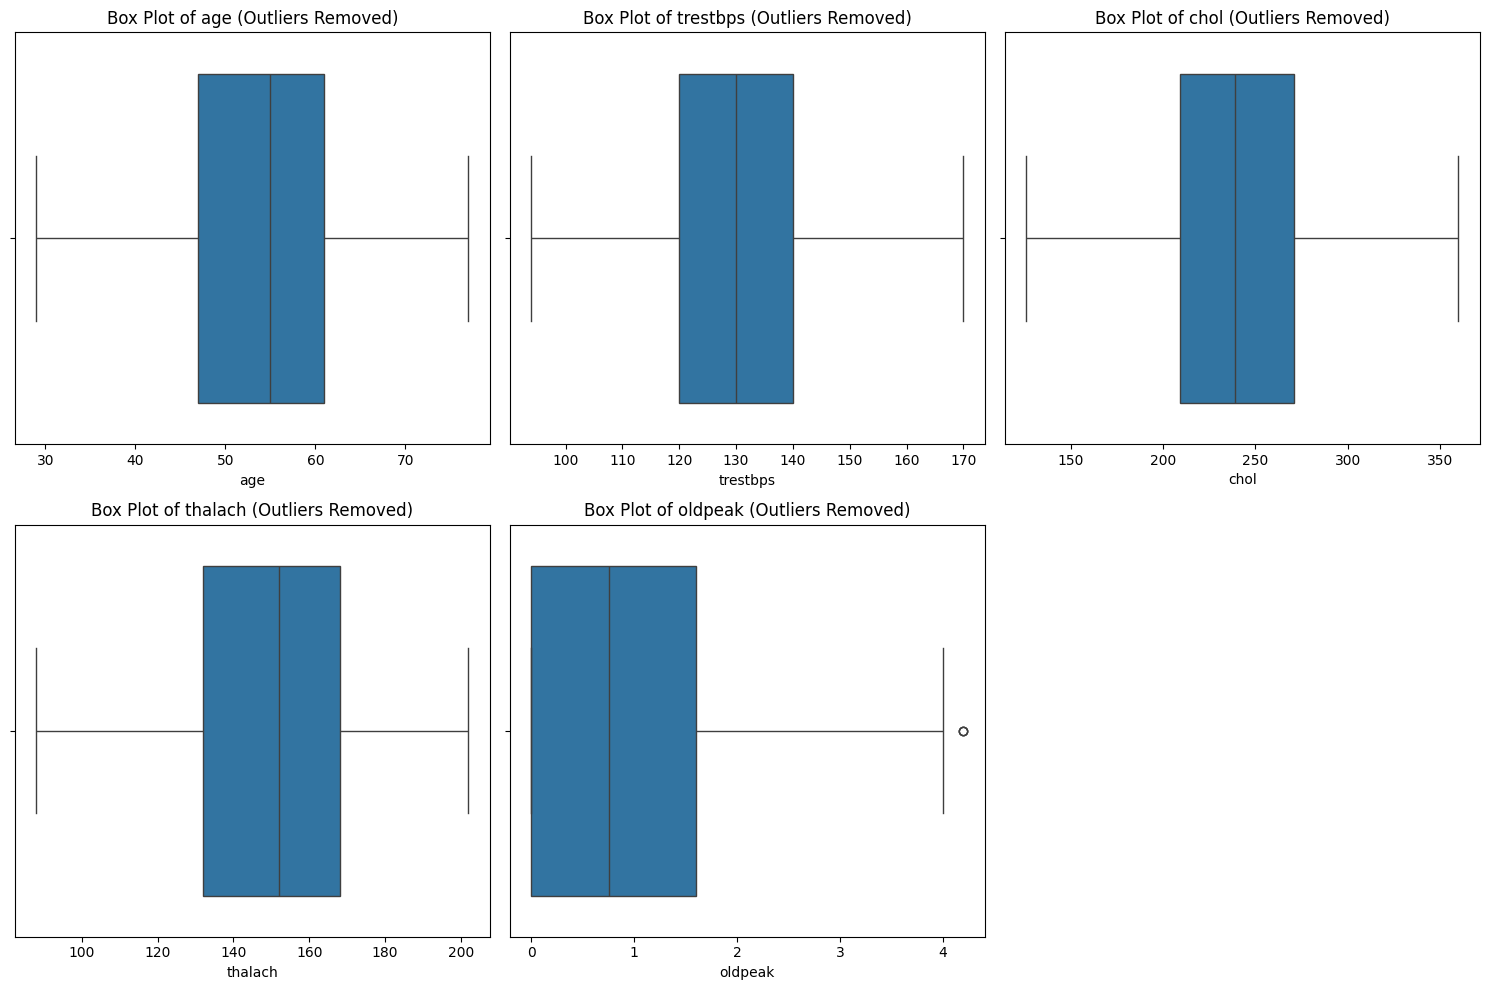

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Function to remove outliers
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# Remove outliers for each numerical feature
for feature in numerical_features:
    df = remove_outliers(df, feature)

# Calculate the number of rows needed for the box plots
num_features = len(numerical_features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each numerical feature and plot
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature} (Outliers Removed)')
    axes[i].set_xlabel(feature)

# Hide any unused subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

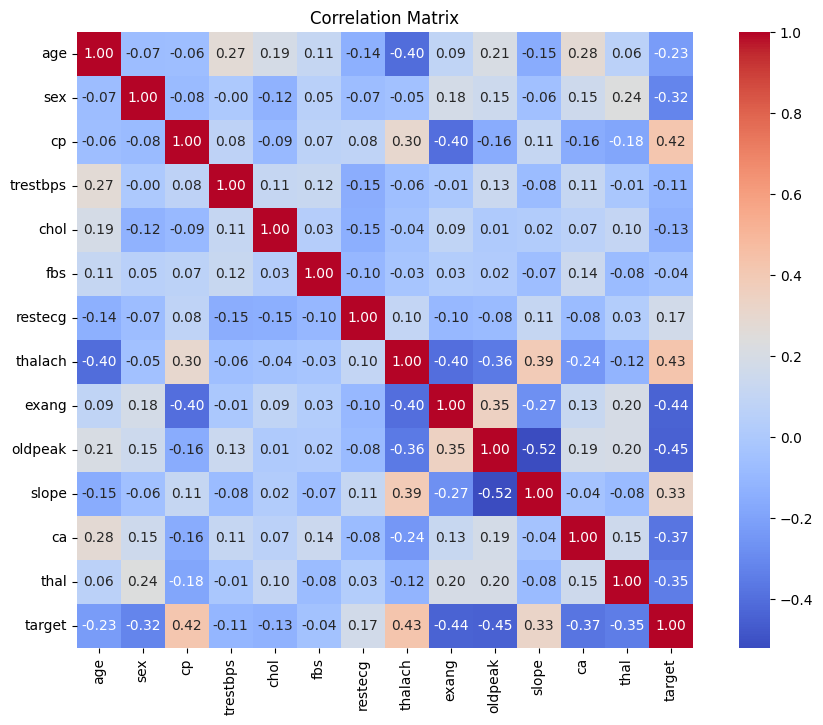

In [14]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

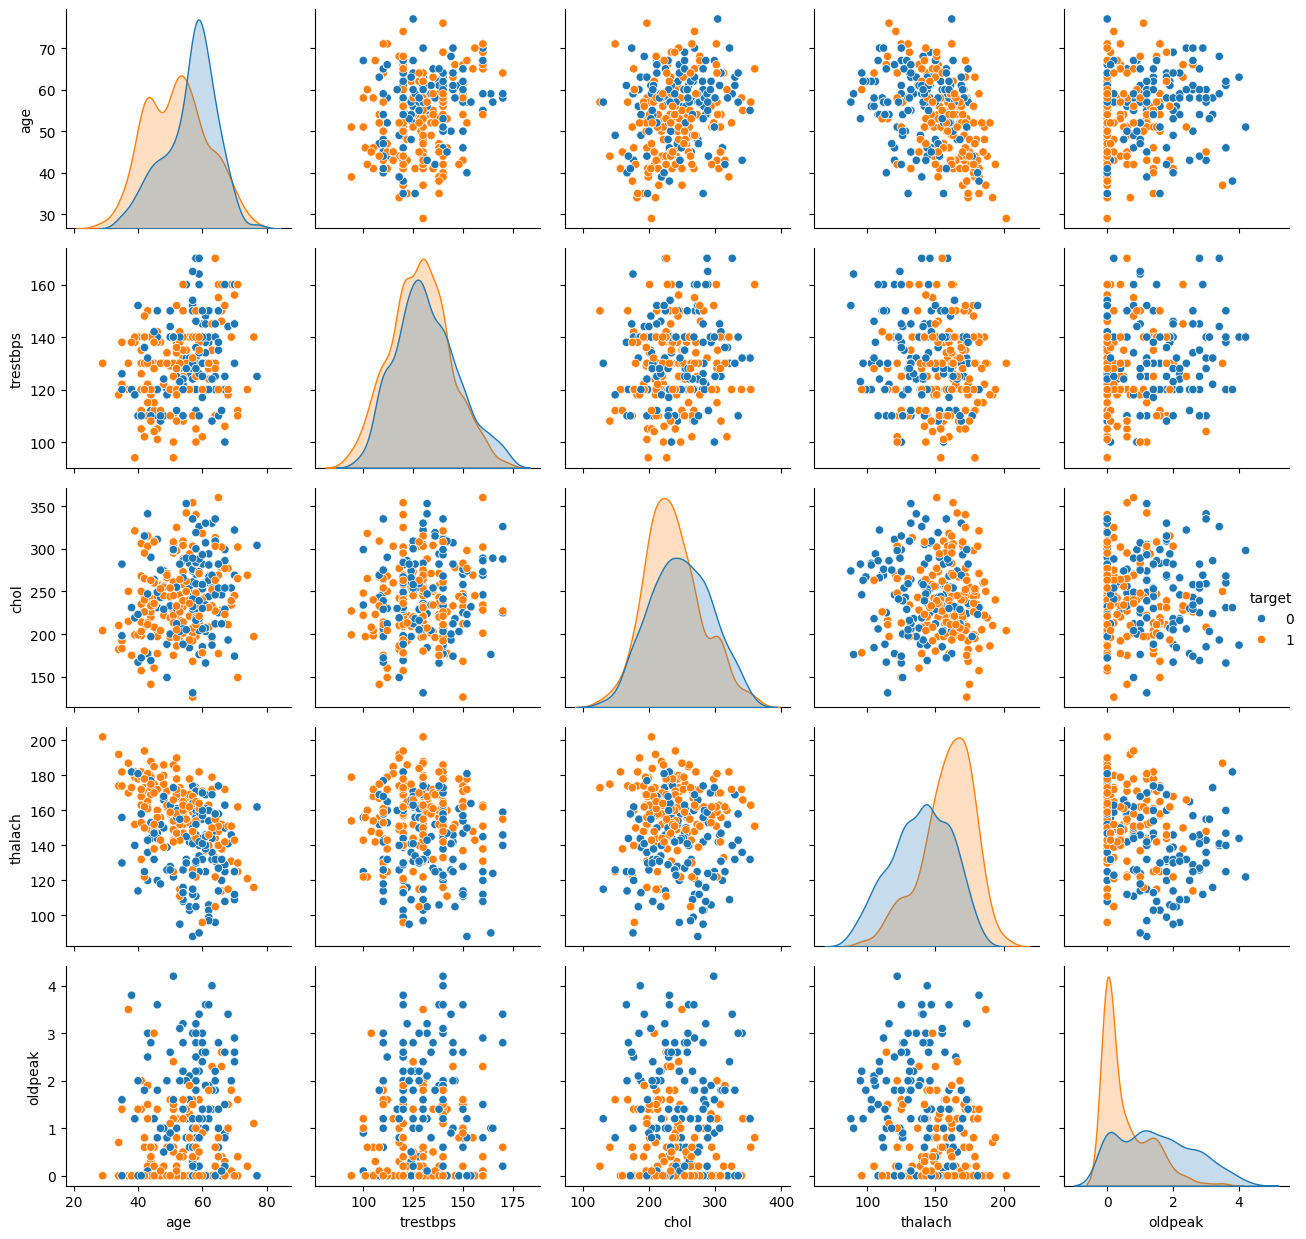

In [ ]:
sns.pairplot(df, hue='target', vars=numerical_features)
plt.tight_layout()
plt.show()

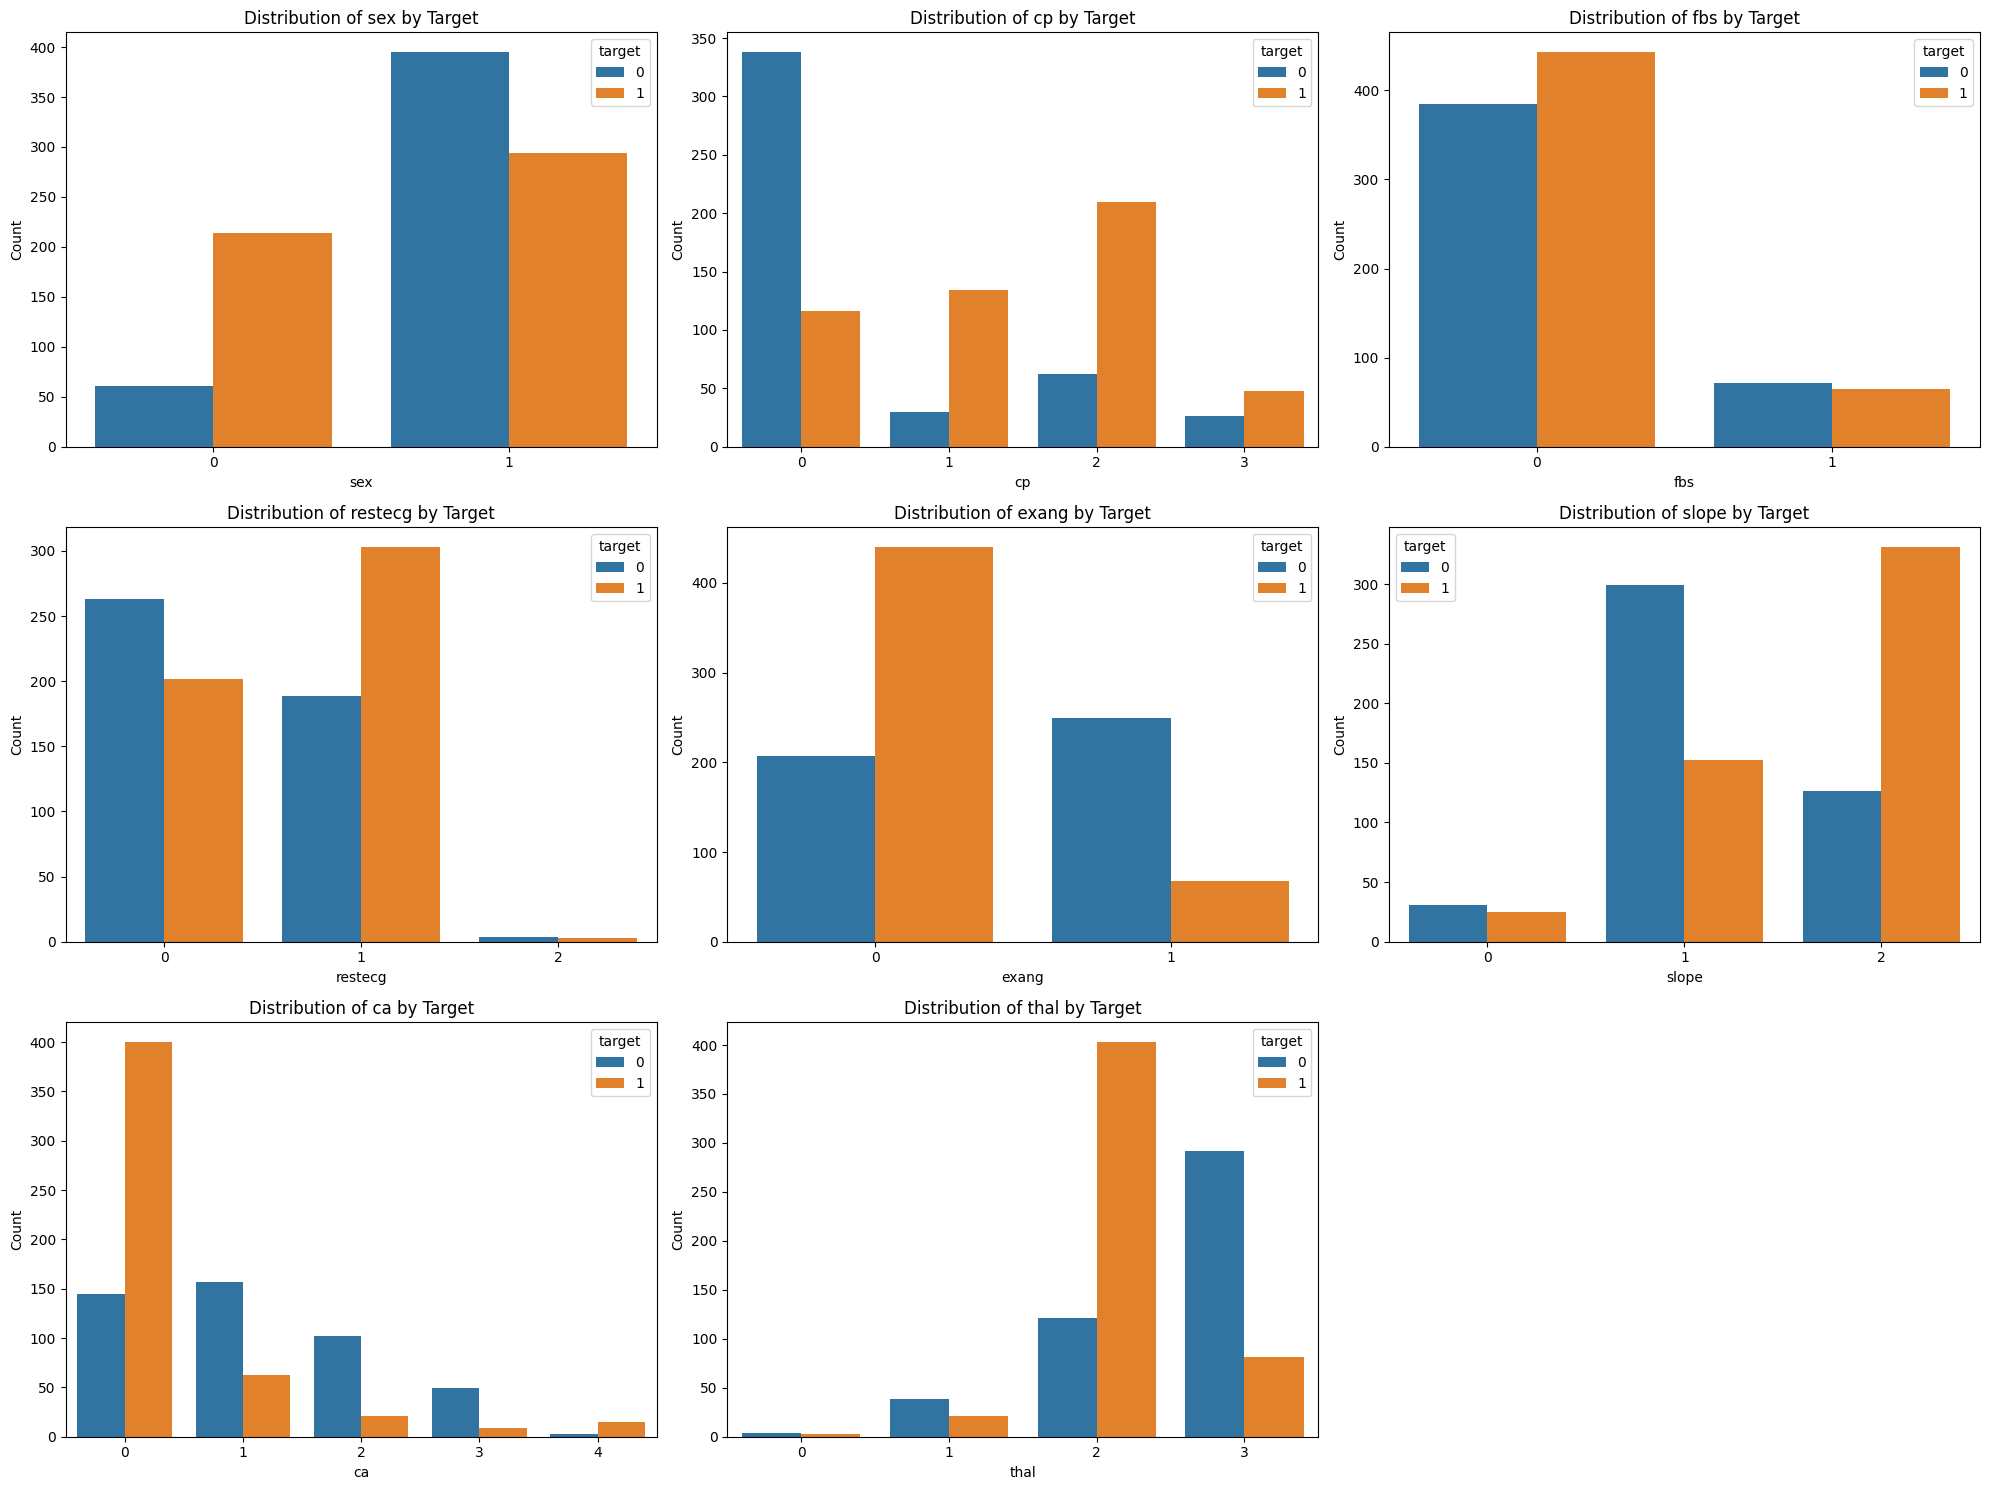

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Calculate the number of rows needed
num_features = len(categorical_features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each categorical feature and plot
for i, var in enumerate(categorical_features):
    sns.countplot(x=var, hue='target', data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {var} by Target')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')

# Hide any unused subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# **Model Building**

### **1. Logistic Regression**

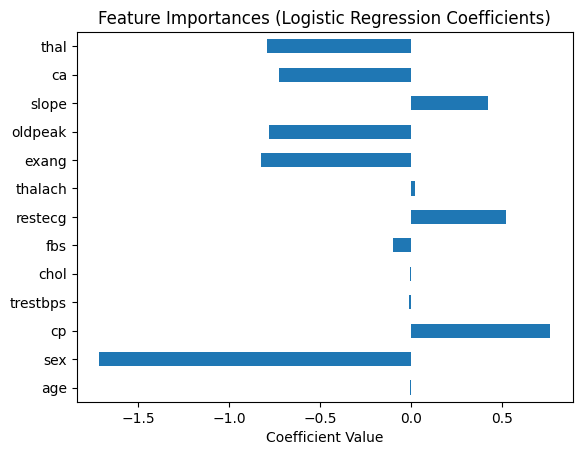

,0
age,-0.007361
sex,-1.712838
cp,0.761715
trestbps,-0.015092
chol,-0.007792
fbs,-0.100080
restecg,0.517946
thalach,0.020393
exang,-0.826460
oldpeak,-0.782707


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train, y_train)

# Get feature importances (coefficients)
feature_importances = pd.Series(model.coef_[0], index=X.columns)

# Plot all feature importances
feature_importances.plot(kind='barh')
plt.title('Feature Importances (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.show()

# Save the feature importances for the next cell
feature_importances

In [ ]:
from sklearn.metrics import accuracy_score

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Evaluate accuracy for different numbers of top features
for n_features in range(1, len(feature_importances) + 1):
    # Select the best features based on importances
    selected_features = feature_importances.nlargest(n_features).index

    # Train the model with the selected features
    model_best = LogisticRegression(max_iter=1000)
    model_best.fit(X_train[selected_features], y_train)

    # Make predictions on the test set
    y_pred = model_best.predict(X_test[selected_features])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with top 1 features: 0.76
Accuracy with top 2 features: 0.74
Accuracy with top 3 features: 0.74
Accuracy with top 4 features: 0.76
Accuracy with top 5 features: 0.76
Accuracy with top 6 features: 0.79
Accuracy with top 7 features: 0.78
Accuracy with top 8 features: 0.78
Accuracy with top 9 features: 0.79
Accuracy with top 10 features: 0.83
Accuracy with top 11 features: 0.84
Accuracy with top 12 features: 0.87
Accuracy with top 13 features: 0.86

Best accuracy: 0.87 using top 12 features:
['cp', 'restecg', 'slope', 'thalach', 'age', 'chol', 'trestbps', 'fbs', 'ca', 'oldpeak', 'thal', 'exang']


### **Logistic Regression with scaled data**

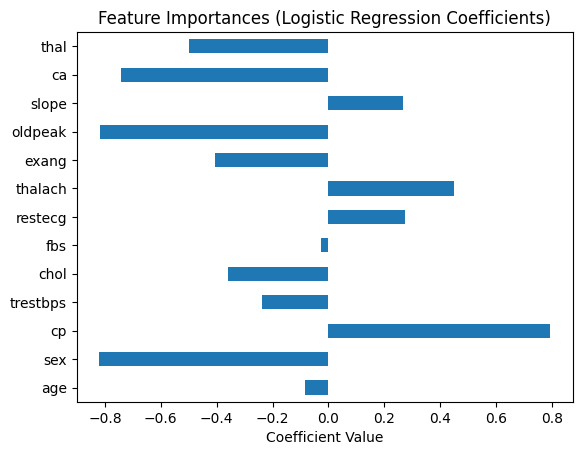

Accuracy with top 1 features: 0.76
Accuracy with top 2 features: 0.75
Accuracy with top 3 features: 0.79
Accuracy with top 4 features: 0.76
Accuracy with top 5 features: 0.75
Accuracy with top 6 features: 0.76
Accuracy with top 7 features: 0.74
Accuracy with top 8 features: 0.77
Accuracy with top 9 features: 0.77
Accuracy with top 10 features: 0.80
Accuracy with top 11 features: 0.82
Accuracy with top 12 features: 0.87
Accuracy with top 13 features: 0.85

Best accuracy: 0.87 using top 12 features:
['cp', 'thalach', 'restecg', 'slope', 'fbs', 'age', 'trestbps', 'chol', 'exang', 'thal', 'ca', 'oldpeak']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Define features and target variable
X = df.drop('target, axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train_scaled, y_train)

# Get feature importances (coefficients)
feature_importances = pd.Series(model.coef_[0], index=X.columns)

# Plot all feature importances
feature_importances.plot(kind='barh')
plt.title('Feature Importances (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.show()

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Evaluate accuracy for different numbers of top features
for n_features in range(1, len(feature_importances) + 1):
    # Select the best features based on importances
    selected_features = feature_importances.nlargest(n_features).index

    # Convert selected features to integer indices
    selected_indices = [X.columns.get_loc(feature) for feature in selected_features]

    # Train the model with the selected features
    model_best = LogisticRegression(max_iter=1000)
    model_best.fit(X_train_scaled[:, selected_indices], y_train)

    # Make predictions on the test set
    y_pred = model_best.predict(X_test_scaled[:, selected_indices])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

## **2. SVC**

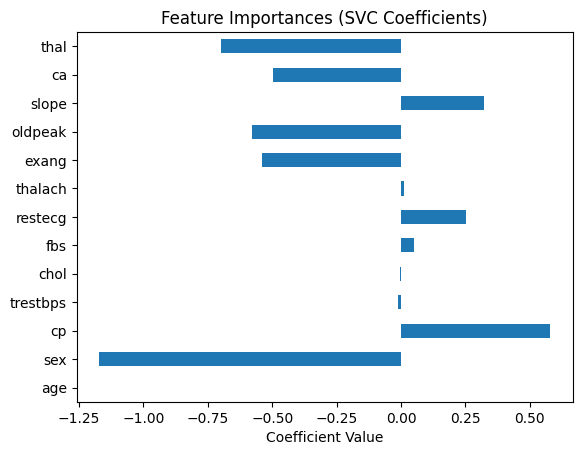

,0
age,0.001310
sex,-1.171502
cp,0.579411
trestbps,-0.009624
chol,-0.004054
fbs,0.050103
restecg,0.250906
thalach,0.013398
exang,-0.538866
oldpeak,-0.577293


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the SVC model
model = SVC(kernel='linear')  # Using a linear kernel for interpretability
model.fit(X_train, y_train)

# Get feature importances (coefficients)
feature_importances = pd.Series(model.coef_[0], index=X.columns)

# Plot all feature importances
feature_importances.plot(kind='barh')
plt.title('Feature Importances (SVC Coefficients)')
plt.xlabel('Coefficient Value')
plt.show()

# Save the feature importances for the next cell
feature_importances

In [ ]:
from sklearn.metrics import accuracy_score

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Evaluate accuracy for different numbers of top features
for n_features in range(1, len(feature_importances) + 1):
    # Select the best features based on importances
    selected_features = feature_importances.nlargest(n_features).index

    # Train the model with the selected features
    model_best = SVC(kernel='linear')  # Using a linear kernel for consistency
    model_best.fit(X_train[selected_features], y_train)

    # Make predictions on the test set
    y_pred = model_best.predict(X_test[selected_features])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with top 1 features: 0.76
Accuracy with top 2 features: 0.72
Accuracy with top 3 features: 0.72
Accuracy with top 4 features: 0.75
Accuracy with top 5 features: 0.76
Accuracy with top 6 features: 0.77
Accuracy with top 7 features: 0.78
Accuracy with top 8 features: 0.79
Accuracy with top 9 features: 0.79
Accuracy with top 10 features: 0.82
Accuracy with top 11 features: 0.80
Accuracy with top 12 features: 0.87
Accuracy with top 13 features: 0.86

Best accuracy: 0.87 using top 12 features:
['cp', 'slope', 'restecg', 'fbs', 'thalach', 'age', 'chol', 'trestbps', 'ca', 'exang', 'oldpeak', 'thal']


## **SVC with scaled data**

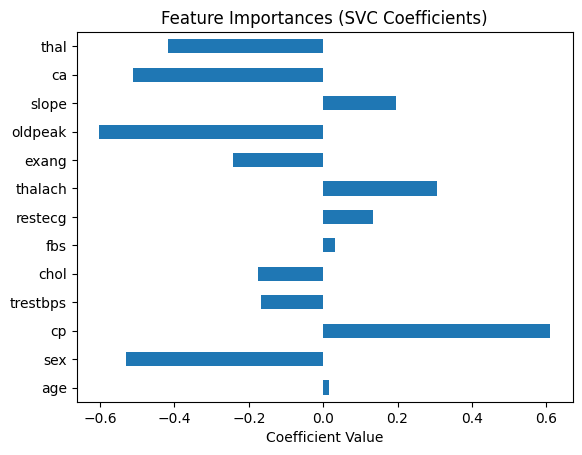

Accuracy with top 1 features: 0.76
Accuracy with top 2 features: 0.77
Accuracy with top 3 features: 0.75
Accuracy with top 4 features: 0.77
Accuracy with top 5 features: 0.76
Accuracy with top 6 features: 0.77
Accuracy with top 7 features: 0.75
Accuracy with top 8 features: 0.79
Accuracy with top 9 features: 0.76
Accuracy with top 10 features: 0.82
Accuracy with top 11 features: 0.82
Accuracy with top 12 features: 0.84
Accuracy with top 13 features: 0.84

Best accuracy: 0.84 using top 13 features:
['cp', 'thalach', 'slope', 'restecg', 'fbs', 'age', 'trestbps', 'chol', 'exang', 'thal', 'ca', 'sex', 'oldpeak']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the SVC model
model = SVC(kernel='linear')  # Using a linear kernel for interpretability
model.fit(X_train_scaled, y_train)

# Get feature importances (coefficients)
feature_importances = pd.Series(model.coef_[0], index=X.columns)

# Plot all feature importances
feature_importances.plot(kind='barh')
plt.title('Feature Importances (SVC Coefficients)')
plt.xlabel('Coefficient Value')
plt.show()

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Evaluate accuracy for different numbers of top features
for n_features in range(1, len(feature_importances) + 1):
    # Select the best features based on importances
    selected_features = feature_importances.nlargest(n_features).index

    # Convert selected features to integer indices
    selected_indices = [X.columns.get_loc(feature) for feature in selected_features]

    # Train the model with the selected features
    model_best = SVC(kernel='linear')  # Using a linear kernel for consistency
    model_best.fit(X_train_scaled[:, selected_indices], y_train)

    # Make predictions on the test set
    y_pred = model_best.predict(X_test_scaled[:, selected_indices])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

## **DTC**

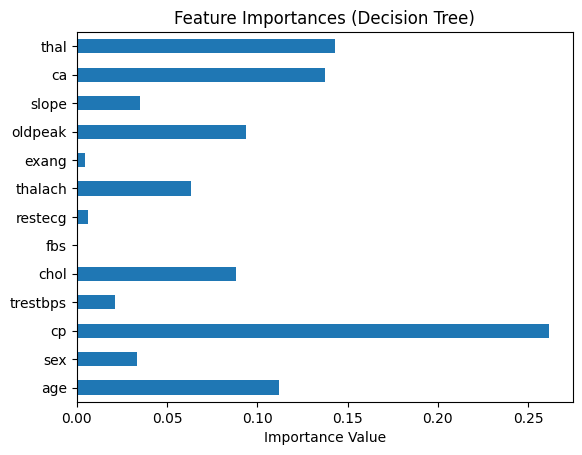

,0
age,0.111991
sex,0.033573
cp,0.261592
trestbps,0.021463
chol,0.088434
fbs,0.000000
restecg,0.006262
thalach,0.063116
exang,0.004697
oldpeak,0.093483


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Plot all feature importances
feature_importances.plot(kind='barh')
plt.title('Feature Importances (Decision Tree)')
plt.xlabel('Importance Value')
plt.show()

# Save the feature importances for the next cell
feature_importances

In [ ]:
from sklearn.metrics import accuracy_score

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Evaluate accuracy for different numbers of top features
for n_features in range(1, len(feature_importances) + 1):
    # Select the best features based on importances
    selected_features = feature_importances.nlargest(n_features).index

    # Train the model with the selected features
    model_best = DecisionTreeClassifier(random_state=42)
    model_best.fit(X_train[selected_features], y_train)

    # Make predictions on the test set
    y_pred = model_best.predict(X_test[selected_features])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with top 1 features: 0.76
Accuracy with top 2 features: 0.76
Accuracy with top 3 features: 0.89
Accuracy with top 4 features: 0.96
Accuracy with top 5 features: 0.99
Accuracy with top 6 features: 1.00
Accuracy with top 7 features: 1.00
Accuracy with top 8 features: 1.00
Accuracy with top 9 features: 1.00
Accuracy with top 10 features: 1.00
Accuracy with top 11 features: 1.00
Accuracy with top 12 features: 1.00
Accuracy with top 13 features: 1.00

Best accuracy: 1.00 using top 6 features:
['cp', 'thal', 'ca', 'age', 'oldpeak', 'chol']


### **Saving the model**

In [ ]:
import joblib

# Save the best model using the selected features
final_model = DecisionTreeClassifier(random_state=42)
final_model.fit(X_train[best_features], y_train)

# Save the model to a file
joblib.dump(final_model, 'best_DTC(Heart).pkl')
print("Model saved as best_DTC(Heart).pkl")

Model saved as best_DTC(Heart).pkl


In [ ]:
import sklearn
print(sklearn.__version__)

1.3.2


## **RFC**

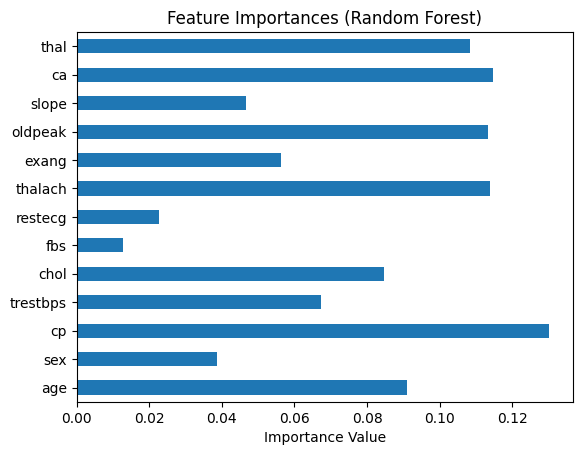

,0
age,0.091139
sex,0.038573
cp,0.130181
trestbps,0.067266
chol,0.084625
fbs,0.012735
restecg,0.022669
thalach,0.113760
exang,0.056215
oldpeak,0.113395


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Plot all feature importances
feature_importances.plot(kind='barh')
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance Value')
plt.show()

# Save the feature importances for the next cell
feature_importances

In [ ]:
from sklearn.metrics import accuracy_score

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Evaluate accuracy for different numbers of top features
for n_features in range(1, len(feature_importances) + 1):
    # Select the best features based on importances
    selected_features = feature_importances.nlargest(n_features).index

    # Train the model with the selected features
    model_best = RandomForestClassifier(random_state=42)
    model_best.fit(X_train[selected_features], y_train)

    # Make predictions on the test set
    y_pred = model_best.predict(X_test[selected_features])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with top 1 features: 0.76
Accuracy with top 2 features: 0.76
Accuracy with top 3 features: 0.91
Accuracy with top 4 features: 0.99
Accuracy with top 5 features: 0.99
Accuracy with top 6 features: 1.00
Accuracy with top 7 features: 1.00
Accuracy with top 8 features: 1.00
Accuracy with top 9 features: 1.00
Accuracy with top 10 features: 1.00
Accuracy with top 11 features: 1.00
Accuracy with top 12 features: 1.00
Accuracy with top 13 features: 1.00

Best accuracy: 1.00 using top 6 features:
['cp', 'ca', 'thalach', 'oldpeak', 'thal', 'age']


# **Training the model with best features & saving it**

In [ ]:
import joblib

# After finding the best accuracy and features, save the model
best_rfc_model = RandomForestClassifier(random_state=42)
best_rfc_model.fit(X_train[best_features], y_train)

# Save the model to a file
joblib.dump(best_rfc_model, 'best_random_forest_model.pkl')

print("Best model saved as 'best_random_forest_model.pkl'")

Best model saved as 'best_random_forest_model.pkl'


## **KNN**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Evaluate accuracy for different numbers of top features
for n_features in range(1, X.shape[1] + 1):
    # Use all features, since KNN does not have inherent feature importances
    selected_features = X.columns[:n_features]

    # Train the model with the selected features
    model_best = KNeighborsClassifier()
    model_best.fit(X_train[selected_features], y_train)

    # Make predictions on the test set
    y_pred = model_best.predict(X_test[selected_features])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with top 1 features: 0.63
Accuracy with top 2 features: 0.73
Accuracy with top 3 features: 0.87
Accuracy with top 4 features: 0.70
Accuracy with top 5 features: 0.70
Accuracy with top 6 features: 0.70
Accuracy with top 7 features: 0.69
Accuracy with top 8 features: 0.70
Accuracy with top 9 features: 0.70
Accuracy with top 10 features: 0.70
Accuracy with top 11 features: 0.70
Accuracy with top 12 features: 0.70
Accuracy with top 13 features: 0.70

Best accuracy: 0.87 using top 3 features:
['age', 'sex', 'cp']


## **Naive Bayes**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import joblib

# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0
best_model = None

# Evaluate accuracy for different numbers of top features
for n_features in range(1, X.shape[1] + 1):
    # Use all features, since Naive Bayes does not have inherent feature importances
    selected_features = X.columns[:n_features]

    # Train the model with the selected features
    model_best = GaussianNB()
    model_best.fit(X_train[selected_features], y_train)

    # Make predictions on the test set
    y_pred = model_best.predict(X_test[selected_features])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features
        best_model = model_best  # Save the best model

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

# Save the best model
joblib.dump(best_model, 'best_naive_bayes_model.pkl')
print("Model saved as 'best_naive_bayes_model.pkl'")

Accuracy with top 1 features: 0.66
Accuracy with top 2 features: 0.67
Accuracy with top 3 features: 0.73
Accuracy with top 4 features: 0.74
Accuracy with top 5 features: 0.73
Accuracy with top 6 features: 0.70
Accuracy with top 7 features: 0.74
Accuracy with top 8 features: 0.79
Accuracy with top 9 features: 0.77
Accuracy with top 10 features: 0.79
Accuracy with top 11 features: 0.80
Accuracy with top 12 features: 0.79
Accuracy with top 13 features: 0.82

Best accuracy: 0.82 using top 13 features:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Model saved as 'best_naive_bayes_model.pkl'


### **2. Bernoulli**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Evaluate accuracy for different numbers of top features
for n_features in range(1, X.shape[1] + 1):
    # Use all features, since Bernoulli Naive Bayes does not have inherent feature importances
    selected_features = X.columns[:n_features]

    # Train the model with the selected features
    model_best = BernoulliNB()
    model_best.fit(X_train[selected_features], y_train)

    # Make predictions on the test set
    y_pred = model_best.predict(X_test[selected_features])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with top 1 features: 0.48
Accuracy with top 2 features: 0.66
Accuracy with top 3 features: 0.76
Accuracy with top 4 features: 0.76
Accuracy with top 5 features: 0.76
Accuracy with top 6 features: 0.77
Accuracy with top 7 features: 0.76
Accuracy with top 8 features: 0.76
Accuracy with top 9 features: 0.78
Accuracy with top 10 features: 0.78
Accuracy with top 11 features: 0.77
Accuracy with top 12 features: 0.84
Accuracy with top 13 features: 0.84

Best accuracy: 0.84 using top 12 features:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']


### **3. Multinomial**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Evaluate accuracy for different numbers of top features
for n_features in range(1, X.shape[1] + 1):
    # Use all features, since Multinomial Naive Bayes does not have inherent feature importances
    selected_features = X.columns[:n_features]

    # Train the model with the selected features
    model_best = MultinomialNB()
    model_best.fit(X_train[selected_features], y_train)

    # Make predictions on the test set
    y_pred = model_best.predict(X_test[selected_features])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with top 1 features: 0.48
Accuracy with top 2 features: 0.46
Accuracy with top 3 features: 0.76
Accuracy with top 4 features: 0.76
Accuracy with top 5 features: 0.74
Accuracy with top 6 features: 0.75
Accuracy with top 7 features: 0.74
Accuracy with top 8 features: 0.76
Accuracy with top 9 features: 0.80
Accuracy with top 10 features: 0.80
Accuracy with top 11 features: 0.79
Accuracy with top 12 features: 0.78
Accuracy with top 13 features: 0.78

Best accuracy: 0.80 using top 9 features:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang']


## **Gradient boosting**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Create and fit the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(gb_model.feature_importances_, index=X.columns)

# Evaluate accuracy for different numbers of top features
for n_features in range(1, len(feature_importances) + 1):
    selected_features = feature_importances.nlargest(n_features).index

    # Train the model with the selected features
    model_best = GradientBoostingClassifier(random_state=42)
    model_best.fit(X_train[selected_features], y_train)

    # Make predictions on the test set
    y_pred = model_best.predict(X_test[selected_features])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with top 1 features: 0.76
Accuracy with top 2 features: 0.76
Accuracy with top 3 features: 0.88
Accuracy with top 4 features: 0.91
Accuracy with top 5 features: 0.96
Accuracy with top 6 features: 0.96
Accuracy with top 7 features: 0.97
Accuracy with top 8 features: 0.98
Accuracy with top 9 features: 0.98
Accuracy with top 10 features: 0.98
Accuracy with top 11 features: 0.98
Accuracy with top 12 features: 0.98
Accuracy with top 13 features: 0.98

Best accuracy: 0.98 using top 8 features:
['cp', 'thal', 'ca', 'oldpeak', 'age', 'thalach', 'chol', 'slope']


## **Gradient Boost with scaled data**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Create and fit the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = pd.Series(gb_model.feature_importances_, index=X.columns)

# Evaluate accuracy for different numbers of top features
for n_features in range(1, len(feature_importances) + 1):
    selected_features = feature_importances.nlargest(n_features).index

    # Train the model with the selected features
    model_best = GradientBoostingClassifier(random_state=42)
    model_best.fit(X_train_scaled[:, :n_features], y_train)  # Use scaled features

    # Make predictions on the test set
    y_pred = model_best.predict(X_test_scaled[:, :n_features])  # Use scaled features

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with top 1 features: 0.68
Accuracy with top 2 features: 0.74
Accuracy with top 3 features: 0.81
Accuracy with top 4 features: 0.88
Accuracy with top 5 features: 0.92
Accuracy with top 6 features: 0.93
Accuracy with top 7 features: 0.92
Accuracy with top 8 features: 0.96
Accuracy with top 9 features: 0.96
Accuracy with top 10 features: 0.96
Accuracy with top 11 features: 0.96
Accuracy with top 12 features: 0.96
Accuracy with top 13 features: 0.98

Best accuracy: 0.98 using top 13 features:
['cp', 'thal', 'ca', 'oldpeak', 'age', 'thalach', 'chol', 'slope', 'sex', 'trestbps', 'exang', 'restecg', 'fbs']


## **XGBoost**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Create and fit the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)

# Evaluate accuracy for different numbers of top features
for n_features in range(1, len(feature_importances) + 1):
    selected_features = feature_importances.nlargest(n_features).index

    # Train the model with the selected features
    model_best = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    model_best.fit(X_train[selected_features], y_train)

    # Make predictions on the test set
    y_pred = model_best.predict(X_test[selected_features])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with top 1 features: 0.76
Accuracy with top 2 features: 0.76
Accuracy with top 3 features: 0.88
Accuracy with top 4 features: 0.88
Accuracy with top 5 features: 0.93
Accuracy with top 6 features: 0.94
Accuracy with top 7 features: 0.99
Accuracy with top 8 features: 1.00
Accuracy with top 9 features: 1.00
Accuracy with top 10 features: 1.00
Accuracy with top 11 features: 1.00
Accuracy with top 12 features: 1.00
Accuracy with top 13 features: 1.00

Best accuracy: 1.00 using top 8 features:
['cp', 'thal', 'ca', 'sex', 'oldpeak', 'slope', 'age', 'chol']


## **XGBoost with scaled data**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Create and fit the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)

# Evaluate accuracy for different numbers of top features
for n_features in range(1, len(feature_importances) + 1):
    selected_features = feature_importances.nlargest(n_features).index

    # Train the model with the selected features
    model_best = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    model_best.fit(X_train_scaled[:, :n_features], y_train)  # Use scaled features

    # Make predictions on the test set
    y_pred = model_best.predict(X_test_scaled[:, :n_features])  # Use scaled features

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with top 1 features: 0.68
Accuracy with top 2 features: 0.72
Accuracy with top 3 features: 0.90
Accuracy with top 4 features: 0.98
Accuracy with top 5 features: 0.98
Accuracy with top 6 features: 0.98
Accuracy with top 7 features: 1.00
Accuracy with top 8 features: 1.00
Accuracy with top 9 features: 1.00
Accuracy with top 10 features: 1.00
Accuracy with top 11 features: 1.00
Accuracy with top 12 features: 1.00
Accuracy with top 13 features: 1.00

Best accuracy: 1.00 using top 7 features:
['cp', 'thal', 'ca', 'sex', 'oldpeak', 'slope', 'age']


##  

## **Ada Boost**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Create a base model (e.g., Decision Tree)
base_model = DecisionTreeClassifier(random_state=42)
ada_model = AdaBoostClassifier(base_estimator=base_model, random_state=42)

# Evaluate accuracy for different numbers of top features
for n_features in range(1, X.shape[1] + 1):
    selected_features = X.columns[:n_features]

    # Train the model with the selected features
    ada_model.fit(X_train[selected_features], y_train)

    # Make predictions on the test set
    y_pred = ada_model.predict(X_test[selected_features])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with top 1 features: 0.69
Accuracy with top 2 features: 0.73
Accuracy with top 3 features: 0.91
Accuracy with top 4 features: 0.98
Accuracy with top 5 features: 0.98
Accuracy with top 6 features: 0.98
Accuracy with top 7 features: 1.00
Accuracy with top 8 features: 1.00
Accuracy with top 9 features: 1.00
Accuracy with top 10 features: 1.00
Accuracy with top 11 features: 1.00
Accuracy with top 12 features: 1.00
Accuracy with top 13 features: 1.00

Best accuracy: 1.00 using top 7 features:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg']


## **AdaBoost with Scaled data**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize variables to store the best accuracy and corresponding features
best_accuracy = 0
best_features = None
best_n_features = 0

# Create a base model (e.g., Decision Tree)
base_model = DecisionTreeClassifier(random_state=42)
ada_model = AdaBoostClassifier(base_estimator=base_model, random_state=42)

# Evaluate accuracy for different numbers of top features
for n_features in range(1, X.shape[1] + 1):
    selected_features = X.columns[:n_features]

    # Train the model with the selected features
    ada_model.fit(X_train_scaled[:, :n_features], y_train)  # Use scaled features

    # Make predictions on the test set
    y_pred = ada_model.predict(X_test_scaled[:, :n_features])  # Use scaled features

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with top {n_features} features: {accuracy:.2f}')

    # Update best accuracy and features if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = selected_features
        best_n_features = n_features

# Final results
print(f'\nBest accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with top 1 features: 0.69
Accuracy with top 2 features: 0.73
Accuracy with top 3 features: 0.91
Accuracy with top 4 features: 0.98
Accuracy with top 5 features: 0.98
Accuracy with top 6 features: 0.98
Accuracy with top 7 features: 1.00
Accuracy with top 8 features: 1.00
Accuracy with top 9 features: 1.00
Accuracy with top 10 features: 1.00
Accuracy with top 11 features: 1.00
Accuracy with top 12 features: 1.00
Accuracy with top 13 features: 1.00

Best accuracy: 1.00 using top 7 features:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg']


## **Ada Boost with different base models**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize variables to store the best model, accuracy, and corresponding features
best_accuracy = 0
best_model = None
best_features = None
best_n_features = 0

# List of base models to evaluate
base_models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Evaluate accuracy for different base models and different numbers of top features
for model_name, base_model in base_models.items():
    ada_model = AdaBoostClassifier(base_estimator=base_model, random_state=42)

    for n_features in range(1, X.shape[1] + 1):
        selected_features = X.columns[:n_features]

        # Train the model with the selected features
        ada_model.fit(X_train[selected_features], y_train)

        # Make predictions on the test set
        y_pred = ada_model.predict(X_test[selected_features])

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy with {model_name} using top {n_features} features: {accuracy:.2f}')

        # Update best accuracy and features if the current accuracy is higher
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model_name
            best_features = selected_features
            best_n_features = n_features

# Final results
print(f'\nBest model: {best_model} with accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with Decision Tree using top 1 features: 0.69
Accuracy with Decision Tree using top 2 features: 0.73
Accuracy with Decision Tree using top 3 features: 0.91
Accuracy with Decision Tree using top 4 features: 0.98
Accuracy with Decision Tree using top 5 features: 0.98
Accuracy with Decision Tree using top 6 features: 0.98
Accuracy with Decision Tree using top 7 features: 1.00
Accuracy with Decision Tree using top 8 features: 1.00
Accuracy with Decision Tree using top 9 features: 1.00
Accuracy with Decision Tree using top 10 features: 1.00
Accuracy with Decision Tree using top 11 features: 1.00
Accuracy with Decision Tree using top 12 features: 1.00
Accuracy with Decision Tree using top 13 features: 1.00
Accuracy with Random Forest using top 1 features: 0.69
Accuracy with Random Forest using top 2 features: 0.73
Accuracy with Random Forest using top 3 features: 0.91
Accuracy with Random Forest using top 4 features: 0.98
Accuracy with Random Forest using top 5 features: 1.00
Accura

## **AdaBoost with different models and scaled data**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
# df = pd.read_csv('diabetes_data.csv')  # Uncomment and load your dataset

# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize variables to store the best model, accuracy, and corresponding features
best_accuracy = 0
best_model = None
best_features = None
best_n_features = 0

# List of base models to evaluate
# Base models to evaluate
base_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB()
}


# Evaluate accuracy for different base models and different numbers of top features
for model_name, base_model in base_models.items():
    ada_model = AdaBoostClassifier(base_estimator=base_model, random_state=42)

    for n_features in range(1, X.shape[1] + 1):
        selected_features = X.columns[:n_features]

        # Train the model with the selected features
        ada_model.fit(X_train_scaled[:, :n_features], y_train)  # Use scaled features

        # Make predictions on the test set
        y_pred = ada_model.predict(X_test_scaled[:, :n_features])  # Use scaled features

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy with {model_name} using top {n_features} features: {accuracy:.2f}')

        # Update best accuracy and features if the current accuracy is higher
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model_name
            best_features = selected_features
            best_n_features = n_features

# Final results
print(f'\nBest model: {best_model} with accuracy: {best_accuracy:.2f} using top {best_n_features} features:')
print(best_features.tolist())

Accuracy with Logistic Regression using top 1 features: 0.67
Accuracy with Logistic Regression using top 2 features: 0.66
Accuracy with Logistic Regression using top 3 features: 0.74
Accuracy with Logistic Regression using top 4 features: 0.75
Accuracy with Logistic Regression using top 5 features: 0.74
Accuracy with Logistic Regression using top 6 features: 0.73
Accuracy with Logistic Regression using top 7 features: 0.73
Accuracy with Logistic Regression using top 8 features: 0.81
Accuracy with Logistic Regression using top 9 features: 0.80
Accuracy with Logistic Regression using top 10 features: 0.82
Accuracy with Logistic Regression using top 11 features: 0.84
Accuracy with Logistic Regression using top 12 features: 0.82
Accuracy with Logistic Regression using top 13 features: 0.83
Accuracy with Decision Tree using top 1 features: 0.69
Accuracy with Decision Tree using top 2 features: 0.73
Accuracy with Decision Tree using top 3 features: 0.91
Accuracy with Decision Tree using top 

# **Neural Network**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(1, activation='sigmoid')  # Binary output
])

# Set a learning rate
learning_rate = 0.01  # You can adjust this value

# Compile the model with the learning rate
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Save the model
#model.save('diabetes_model.h5')

# To load the model later
# loaded_model = keras.models.load_model('diabetes_model.h5')

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6674 - loss: 0.5985 - val_accuracy: 0.8000 - val_loss: 0.4134
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8366 - loss: 0.3810 - val_accuracy: 0.8516 - val_loss: 0.3781
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8579 - loss: 0.3405 - val_accuracy: 0.8516 - val_loss: 0.3696
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8751 - loss: 0.3185 - val_accuracy: 0.8645 - val_loss: 0.3572
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8938 - loss: 0.2775 - val_accuracy: 0.8581 - val_loss: 0.3494
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9107 - loss: 0.2481 - val_accuracy: 0.8710 - val_loss: 0.3370
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9099 - loss: 0.2601 - val_accuracy: 0.8581 - val_loss: 0.3291
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8928 - loss: 0.2629 - val_accuracy: 0.8581 - 

#         